In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
dataset = pd.read_csv('data\iris.data', names=['sep lnth', 'sep wdth', 'pet lnth', 'pet wdth'], index_col=4)
dataset

,sep lnth,sep wdth,pet lnth,pet wdth
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0
Iris-virginica,6.2,3.4,5.4,2.3


In [4]:
dataset.describe()

,sep lnth,sep wdth,pet lnth,pet wdth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Covariance Matrix: 
cov_m = dataset.T @ dataset
cov_m

,sep lnth,sep wdth,pet lnth,pet wdth
sep lnth,5223.85,2670.98,3484.25,1127.65
sep wdth,2670.98,1427.05,1673.91,531.53
pet lnth,3484.25,1673.91,2583.00,868.97
pet wdth,1127.65,531.53,868.97,302.30


It looks like the greatest covarience occurs between sepal and petal length. This makes me want to plot the two.

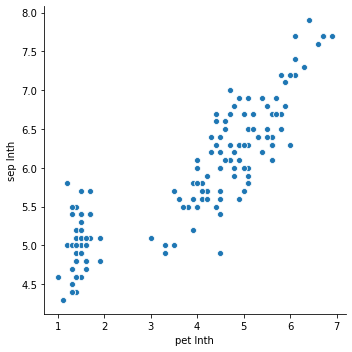

In [6]:
sns.relplot(x='pet lnth', y='sep lnth', data=dataset)

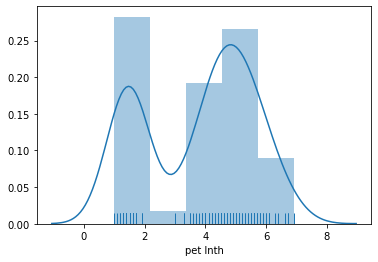

In [28]:
sns.distplot(dataset['pet lnth'], rug=True) # A kernel density estimate (estimate of probability density function)

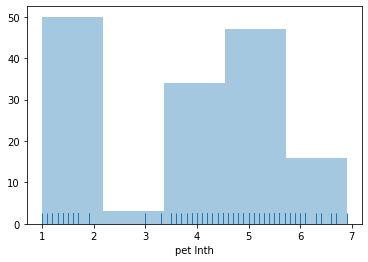

In [29]:
sns.distplot(dataset['pet lnth'], kde=False) 

Let's try to predict sepal length based on petal width. First, we split our data into dependent and independent variables. Then, we will pull out some of the data and reserve it for testing after we have trained our model:

In [10]:
X = dataset['pet wdth'].to_numpy().reshape(-1,1)
Y = dataset['sep wdth'].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)

Now, we have split our data out and we want to train our model:

In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, we can find the parameters of our model, namely slope and intercept:

In [98]:
print(regressor.intercept_)
print(regressor.coef_)

[3.24343302]
[[-0.16196015]]


And now to make test predictions with unlabeled data, we can use our x_test data, which was previously split from our initial dataset:

In [99]:
y_pred = regressor.predict(x_test)
y_pred.shape


(45, 1)

Now, lets put our findings into a data frame, look at the data and then plot it!

In [116]:
df = pd.DataFrame(data={'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,2.8,2.854729
1,2.2,3.081473
2,4.2,3.211041
3,2.9,2.951905
4,3.4,3.211041
5,3.3,2.838533
6,3.5,3.194845
7,3.1,3.000493
8,2.8,3.016689
9,2.8,3.032885


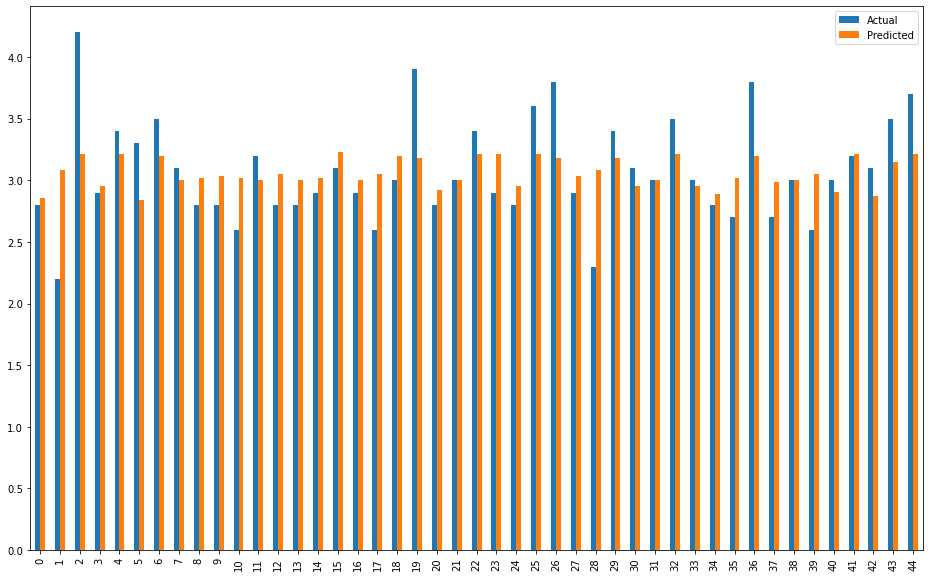

In [101]:
# Plot with Pandas DataFrame.plot()
df.plot(kind='bar', figsize=(16,10))

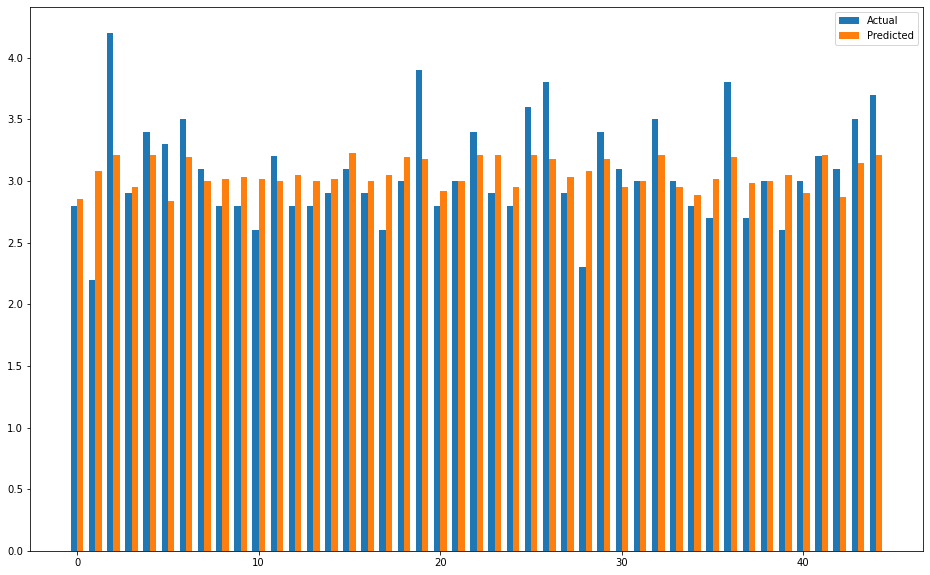

In [102]:
# Plot with base matplotlib. Much harder than using pandas.DataFrame.plot()

plt.figure(figsize=(16,10))
plt.bar(df.index - .35/2, df.iloc[:,0], .35, label='Actual')
plt.bar(df.index + .35/2, df.iloc[:,1], .35, label='Predicted')
plt.legend()

Let's try doing the same plot one more time, except using Seaborn. Seaborn requires data to be in long format if you want to plot groups of bars based on categories. As a refresher, here are the definitions:

- __Long/Tidy/Narrow:__ All data is arranged in a single column, while a second column describes each data point with an attribute/variable name.

- __Short/Wide:__ Each variable gets its own column, so that each row is a specific instance/sample/realization of that variable. 

In our case, the two categories we want to plot side by side are __Actual__ and __Predicted__. However, since we are putting our data into long form (where all values are in a single column, regardless of the variable they describe), we need to make sure that our sample numbers stay associated with their corresponding variables. In other words sample 0 should be associated with two values: One categorized by "Actual" and the other categorized by "Predicted". In our current wide form, this mapping is mainteained by our dataframe index, but that will be lost when we melt, unless we make the index a column in our dataframe:

In [109]:
df_melted = df.reset_index().melt(id_vars='index')
df_melted

,index,variable,value
0,0,Actual,2.800000
1,1,Actual,2.200000
2,2,Actual,4.200000
3,3,Actual,2.900000
4,4,Actual,3.400000
...,...,...,...
85,40,Predicted,2.903317
86,41,Predicted,3.211041
87,42,Predicted,2.870925
88,43,Predicted,3.146257


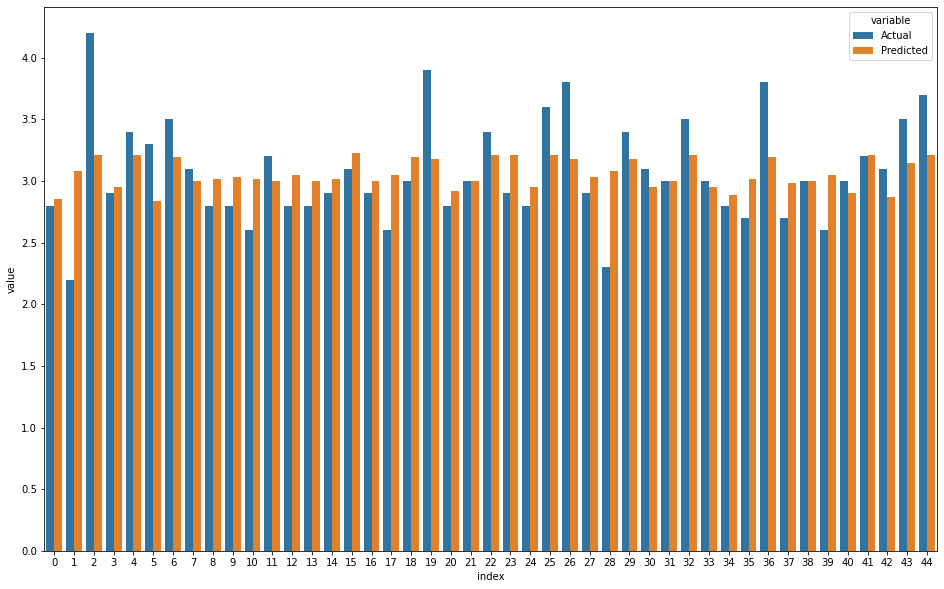

In [112]:
plt.figure(figsize=(16,10))
sns.barplot(data=df_melted, x='index', y='value', hue='variable')